# ANÁLISE DE RECEITAS E VENDAS


**OBJETIVOS**


- Verificar as vendas com base nos anos e meses.

- Identificar os produtos que mais vendem, e os que mais geram receita.

- Verificar o total de descontos concebidos por produto.

- Selecionar os clientes que mais fazem compras e que mais gastam.

- Identificar os estados que mais geram receita.

- Identificar os vendedores que mais vendem, e os que menos vendem.



---



# **Análise Preliminar**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as str
import matplotlib.pyplot as plt

In [2]:
!pip install xlrd

In [3]:
dfClientes = pd.read_excel('/content/drive/MyDrive/trabalhos/python/loja_bicicletas_2/Dados.xlsx', sheet_name='Clientes')
dfVendedores = pd.read_excel('/content/drive/MyDrive/trabalhos/python/loja_bicicletas_2/Dados.xlsx', sheet_name='Vendedores')
dfProdutos = pd.read_excel('/content/drive/MyDrive/trabalhos/python/loja_bicicletas_2/Dados.xlsx', sheet_name='Produtos')
dfVendas = pd.read_excel('/content/drive/MyDrive/trabalhos/python/loja_bicicletas_2/Dados.xlsx', sheet_name='Vendas')
dfItensVendas = pd.read_excel('/content/drive/MyDrive/trabalhos/python/loja_bicicletas_2/Dados.xlsx', sheet_name='ItensVendas')

## dfClientes

In [4]:
dfClientes

,ClienteID,Cliente,Estado,Genero,Status
0,1,Adelina Buenaventura,RJ,M,Silver
1,2,Adelino Gago,RJ,M,Silver
2,3,Adolfo Patrício,PE,M,Silver
3,4,Adriana Guedelha,RO,F,Platinum
4,5,Adélio Lisboa,SE,M,Silver
...,...,...,...,...,...
245,246,Jandaíra Albuquerque,SP,F,Silver
246,247,Joana Ataí,GO,F,Platinum
247,248,Joaquim Hurtado,AP,M,Silver
248,249,Joaquim Mieiro,TO,M,Silver


**Dados duplicados**

In [5]:
# Dados duplicados pelo ClienteID
dfClientes.ClienteID.duplicated().sum()

0

In [6]:
# Mostra a linha inteira do dado duplicado
dfClientes[dfClientes.duplicated(['ClienteID'],keep=False)]

,ClienteID,Cliente,Estado,Genero,Status


**Dados em NAN**

In [7]:
dfClientes.isnull().sum()

,0
ClienteID,0
Cliente,0
Estado,0
Genero,0
Status,0


## dfVendedores

In [8]:
dfVendedores

,VendedorID,Vendedor
0,1,Armando Lago
1,2,Capitolino Bahía
2,3,Daniel Pirajá
3,4,Godo Capiperibe
4,5,Hélio Liberato
5,6,Iberê Lacerda
6,7,Jéssica Castelão
7,8,Napoleão Méndez
8,9,Simão Rivero
9,10,Tobias Furtado


**Dados duplicados**

In [9]:
# Dados duplicados pelo VendedorID
dfVendedores.VendedorID.duplicated().sum()

0

In [10]:
dfVendedores[dfVendedores.duplicated(['VendedorID'],keep=False)]

,VendedorID,Vendedor


**Dados em NAN**

In [11]:
dfVendedores.isnull().sum()

,0
VendedorID,0
Vendedor,0


## dfProdutos

In [12]:
dfProdutos

,ProdutoID,Produto,Preco
0,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,8852
1,2,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201
2,3,Bicicleta Gts Advanced 1.0 Aro 29 Freio Disco ...,4255
3,4,Bicicleta Trinc Câmbios Shimano Aro 29 Freio A...,7658
4,5,Bicicleta Gometws Endorphine 7.3 - Shimano Alu...,2966
5,6,Bicicleta Gometws Endorphine 6.1 Shimano Alumí...,2955
6,7,Capacete Gometws Endorphine 2.0,155
7,8,Luva De Ciclismo - Gometws Sports,188
8,9,Bermuda Predactor 3Xu Pro,115
9,10,Camiseta Predactor 3Xu Multiplied,135


**Dados duplicados**

In [13]:
# Dados duplicados pelo ProdutoID
dfProdutos.ProdutoID.duplicated().sum()

0

In [14]:
dfProdutos[dfProdutos.duplicated(['ProdutoID'],keep=False)]

,ProdutoID,Produto,Preco


In [15]:
# Dados duplicados pelo Produto
dfProdutos.Produto.duplicated().sum()

0

In [16]:
dfProdutos[dfProdutos.duplicated(['Produto'],keep=False)]

,ProdutoID,Produto,Preco


**Dados em NAN**

In [17]:
dfProdutos.isnull().sum()

,0
ProdutoID,0
Produto,0
Preco,0


**Outliers**

In [18]:
dfProdutos['Preco'].describe()

,Preco
count,10.000000
mean,3648.000000
std,3716.438767
min,115.000000
25%,163.250000
50%,2960.500000
75%,6807.250000
max,9201.000000


<Axes: >

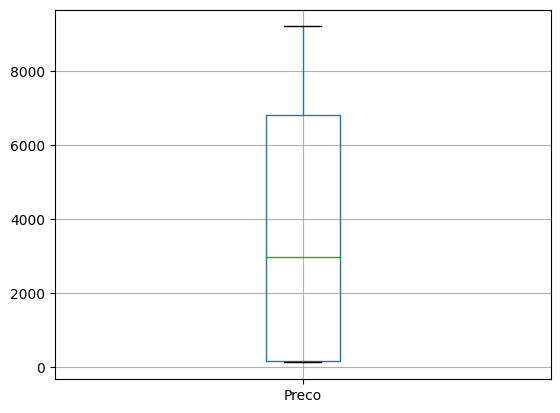

In [19]:
# sns.boxplot(data=dfProdutos['Preco']).set_title('Preço')
# plt.show()
dfProdutos.boxplot(column=['Preco'])

## dfVendas

In [20]:
dfVendas

,VendasID,VendedorID,ClienteID,Data,Total
0,1,1,91,1/1/2019,8053.60
1,2,6,185,1/1/2020,150.40
2,3,7,31,2/1/2020,6087.00
3,4,5,31,2/1/2019,13828.60
4,5,5,31,3/1/2018,26096.66
...,...,...,...,...,...
395,396,5,103,23/12/2018,10415.38
396,397,5,58,23/12/2019,16995.20
397,398,1,58,24/12/2019,5183.30
398,399,4,58,25/12/2019,14592.63


**Dados duplicados**

In [21]:
# Dados duplicados pelo VendasID
dfVendas.VendasID.duplicated().sum()

0

**Dados em NAN**

In [22]:
dfVendas.isnull().sum()

,0
VendasID,0
VendedorID,0
ClienteID,0
Data,0
Total,0


**Outliers**

In [23]:
#  Total
dfVendas['Total'].describe()

,Total
count,400.000000
mean,7635.406825
std,6509.756869
min,91.800000
25%,2603.830000
50%,6690.545000
75%,11376.195000
max,32495.400000


<Axes: >

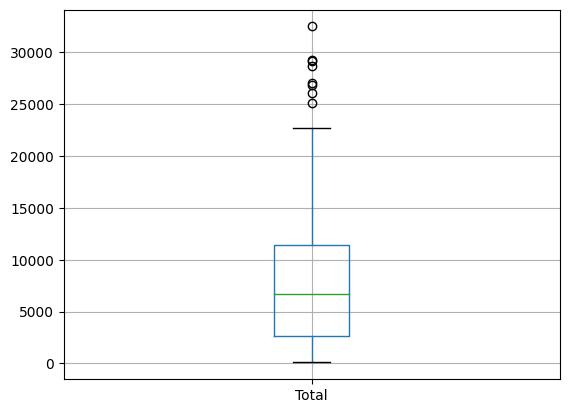

In [24]:
# Outlier da coluna Total
dfVendas.boxplot(column=['Total'])

In [25]:
# Valor da venda (Total) por ordem decrescente de acordo com o ID da venda (VendasID)
dfVendas.groupby('VendasID').sum().Total.sort_values(ascending=False)

,Total
VendasID,
346,32495.40
104,29307.48
320,29180.40
172,28660.30
355,27016.24
...,...
262,97.75
231,97.75
247,97.20


In [26]:
# Calcular o desvio padrão de Total (valor da venda)
desv = dfVendas['Total'].std()
desv

6509.7568694517395

In [27]:
# Localizar as vendas maiores que quatro devios padrão através da coluna Total
dfVendas.loc[dfVendas['Total'] >= 4 * desv]

,VendasID,VendedorID,ClienteID,Data,Total
4,5,5,31,3/1/2018,26096.66
103,104,5,233,30/3/2018,29307.48
171,172,5,58,2/6/2018,28660.30
247,248,10,58,18/8/2018,26852.87
319,320,2,203,27/10/2020,29180.40
345,346,6,31,16/11/2018,32495.40
354,355,5,5,23/11/2019,27016.24


## dfItensVendas

In [28]:
dfItensVendas

,ProdutoID,VendasID,Quantidade,ValorUnitario,ValorTotal,Desconto,TotalComDesconto
0,2,400,2,9201.00,18402.00,6256.6800,12145.3200
1,2,385,2,9201.00,18402.00,5704.6200,12697.3800
2,4,395,2,6892.20,13784.40,5100.2280,8684.1720
3,4,367,2,6509.30,13018.60,4816.8820,8201.7180
4,2,380,2,7038.77,14077.54,4364.0374,9713.5026
...,...,...,...,...,...,...,...
935,10,56,1,91.80,91.80,0.0000,91.8000
936,9,56,1,87.98,87.98,0.0000,87.9800
937,9,65,1,87.98,87.98,0.0000,87.9800
938,9,34,1,78.20,78.20,0.0000,78.2000


**Dados duplicados**

In [29]:
# Dados duplicados pelo VendasID
dfItensVendas.VendasID.duplicated().sum()

540

In [30]:
dfItensVendas[dfItensVendas.duplicated(['VendasID'],keep=False)]

,ProdutoID,VendasID,Quantidade,ValorUnitario,ValorTotal,Desconto,TotalComDesconto
2,4,395,2,6892.20,13784.40,5100.2280,8684.1720
3,4,367,2,6509.30,13018.60,4816.8820,8201.7180
4,2,380,2,7038.77,14077.54,4364.0374,9713.5026
5,2,346,2,8280.90,16561.80,4140.4500,12421.3500
6,2,339,2,8280.90,16561.80,3312.3600,13249.4400
...,...,...,...,...,...,...,...
935,10,56,1,91.80,91.80,0.0000,91.8000
936,9,56,1,87.98,87.98,0.0000,87.9800
937,9,65,1,87.98,87.98,0.0000,87.9800
938,9,34,1,78.20,78.20,0.0000,78.2000


Obs. Tudo ok com dfItensVendas, os dados analisados acima não são duplicados

**Dados em NAN**

In [31]:
dfItensVendas.isnull().sum()

,0
ProdutoID,0
VendasID,0
Quantidade,0
ValorUnitario,0
ValorTotal,0
Desconto,0
TotalComDesconto,0


**Outliers**

<Axes: >

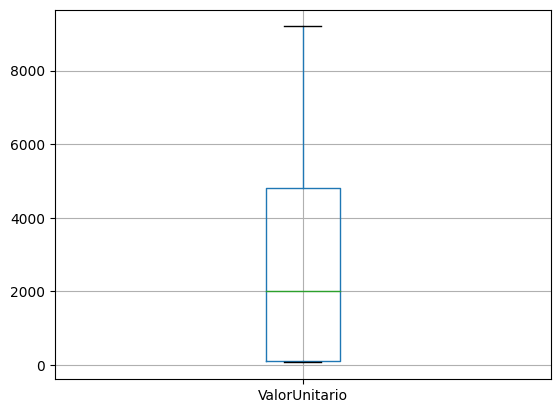

In [32]:
# Outlier da coluna ValorUnitario
dfItensVendas.boxplot(column=['ValorUnitario'])

<Axes: >

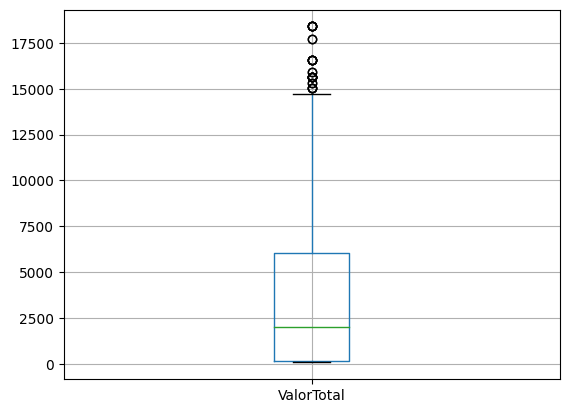

In [33]:
# Outlier da coluna ValorTotal
dfItensVendas.boxplot(column=['ValorTotal'])

In [34]:
# Valor total da venda (ValorTotal) por ordem decrescente de acordo com o ID da venda (VendasID)
dfItensVendas.groupby('VendasID').sum().ValorTotal.sort_values(ascending=False)

,ValorTotal
VendasID,
346,32495.40
104,29307.48
320,29180.40
172,28660.30
355,27016.24
...,...
262,97.75
231,97.75
247,97.20


<Axes: >

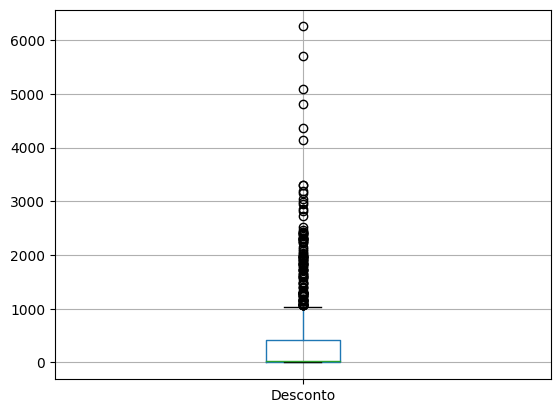

In [35]:
# Outlier da coluna Desconto
dfItensVendas.boxplot(column=['Desconto'])

In [36]:
# Desconto (Desconto) por ordem decrescente de acordo com o ID da venda (VendasID)
dfItensVendas.groupby('VendasID').sum().Desconto.sort_values(ascending=False)

,Desconto
VendasID,
346,7327.1700
355,6716.3709
397,6266.4060
400,6256.6800
385,5704.6200
...,...
17,0.0000
65,0.0000
57,0.0000


<Axes: >

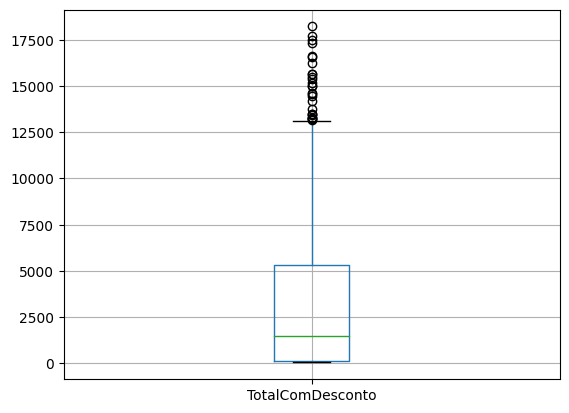

In [37]:
# Outlier da coluna TotalComDesconto
dfItensVendas.boxplot(column=['TotalComDesconto'])

In [38]:
# Desconto total (TotalComDesconto) por ordem decrescente de acordo com o ID da venda (VendasID)
dfItensVendas.groupby('VendasID').sum().TotalComDesconto.sort_values(ascending=False)

,TotalComDesconto
VendasID,
104,28621.9500
172,26263.5210
5,26030.3434
346,25168.2300
320,24037.8850
...,...
231,83.0875
203,82.8000
351,79.6950


Obs. Tudo ok com os outliers referentes ao dfItensVendas, tais outliers do dataframe em questão foram provocados pelo alto valor das vendas, uma prova disso é que os outliers referentes a descontos acompanham os valores das vendas, sendo quanto maior o valor da venda, maior o valor do desconto






# **Data Cleanning**

Esta etapa não é nescessária, pois em Análise Preliminar foi visto

que todos os dataframes estão com sua integridade intacta


# **Consistência entre as Tabelas**

In [39]:
# Filtra os ClienteID do dataframe dfVendas que não estão dentro do dataframe dfClientes
dfVendas[~dfVendas.ClienteID.isin(dfClientes.ClienteID)]

,VendasID,VendedorID,ClienteID,Data,Total


In [40]:
# Filtra os VendedorID do dataframe dfVendas que não estão dentro do dataframe VendedorID
dfVendas[~dfVendas.VendedorID.isin(dfVendedores.VendedorID)]

,VendasID,VendedorID,ClienteID,Data,Total


In [41]:
# Filtra as VendasID do dataframe dfVendas que não estão dentro do dataframe dfItensVendas
dfVendas[~dfVendas.VendasID.isin(dfItensVendas.VendasID)]

,VendasID,VendedorID,ClienteID,Data,Total


In [42]:
# Filtra os ProdutoID do dataframe dfItensVendas que não estão dentro do dataframe dfProdutos
dfItensVendas[~dfItensVendas.ProdutoID.isin(dfProdutos.ProdutoID)]

,ProdutoID,VendasID,Quantidade,ValorUnitario,ValorTotal,Desconto,TotalComDesconto


# **Unir Id**

In [43]:
# Converter o id para que o id seja o próprio index do dataframe (não existe mais coluna id, o id agora é o index do dataframe)
dfClientes = dfClientes.set_index('ClienteID')
dfClientes

,Cliente,Estado,Genero,Status
ClienteID,,,,
1,Adelina Buenaventura,RJ,M,Silver
2,Adelino Gago,RJ,M,Silver
3,Adolfo Patrício,PE,M,Silver
4,Adriana Guedelha,RO,F,Platinum
5,Adélio Lisboa,SE,M,Silver
...,...,...,...,...
246,Jandaíra Albuquerque,SP,F,Silver
247,Joana Ataí,GO,F,Platinum
248,Joaquim Hurtado,AP,M,Silver


In [44]:
# Fazer o mesmo com os outros dataframse
dfVendedores = dfVendedores.set_index('VendedorID')
dfProdutos = dfProdutos.set_index('ProdutoID')
dfVendas = dfVendas.set_index('VendasID')
dfItensVendas = dfItensVendas.set_index('ProdutoID')

# **Unir Tabelas**

In [45]:
# Criar o dataframe df unindo dfVendas com dfClientes e adicionar o prefixo Cliente_ nas colunas de dfClientes
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'ClienteID')

In [46]:
# Resultado
# df

In [47]:
# Juntar df com dfVendedores e armazenar em df_principal
df_principal = df.join(dfVendedores.add_prefix('Nome_'), on = 'VendedorID')
df_principal.head(5)

,VendedorID,ClienteID,Data,Total,cliente_Cliente,cliente_Estado,cliente_Genero,cliente_Status,Nome_Vendedor
VendasID,,,,,,,,,
1,1,91,1/1/2019,8053.60,Cosme Zambujal,BA,M,Silver,Armando Lago
2,6,185,1/1/2020,150.40,Gertrudes Hidalgo,PA,F,Silver,Iberê Lacerda
3,7,31,2/1/2020,6087.00,Antão Corte-Real,ES,M,Silver,Jéssica Castelão
4,5,31,2/1/2019,13828.60,Antão Corte-Real,ES,M,Silver,Hélio Liberato
5,5,31,3/1/2018,26096.66,Antão Corte-Real,ES,M,Silver,Hélio Liberato


In [48]:
# Corrigir o formato das datas
df_principal.Data = pd.to_datetime(df_principal.Data, format='%d/%m/%Y')
df_principal.head(5)

,VendedorID,ClienteID,Data,Total,cliente_Cliente,cliente_Estado,cliente_Genero,cliente_Status,Nome_Vendedor
VendasID,,,,,,,,,
1,1,91,2019-01-01,8053.60,Cosme Zambujal,BA,M,Silver,Armando Lago
2,6,185,2020-01-01,150.40,Gertrudes Hidalgo,PA,F,Silver,Iberê Lacerda
3,7,31,2020-01-02,6087.00,Antão Corte-Real,ES,M,Silver,Jéssica Castelão
4,5,31,2019-01-02,13828.60,Antão Corte-Real,ES,M,Silver,Hélio Liberato
5,5,31,2018-01-03,26096.66,Antão Corte-Real,ES,M,Silver,Hélio Liberato


In [49]:
# Juntar dfItensVendas com dfProdutos e armazenar em df_secundario
df_secundario = dfItensVendas.join(dfProdutos.add_prefix('Produto_'), on = 'ProdutoID')
df_secundario.head(5)

,VendasID,Quantidade,ValorUnitario,ValorTotal,Desconto,TotalComDesconto,Produto_Produto,Produto_Preco
ProdutoID,,,,,,,,
2,400,2,9201.00,18402.00,6256.6800,12145.3200,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201
2,385,2,9201.00,18402.00,5704.6200,12697.3800,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201
4,395,2,6892.20,13784.40,5100.2280,8684.1720,Bicicleta Trinc Câmbios Shimano Aro 29 Freio A...,7658
4,367,2,6509.30,13018.60,4816.8820,8201.7180,Bicicleta Trinc Câmbios Shimano Aro 29 Freio A...,7658
2,380,2,7038.77,14077.54,4364.0374,9713.5026,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201


# **Análise de Vendas e Receitas**

## Vendas por ano

In [50]:
# Extrair o ano da coluna 'Data'
df_principal['ano'] = pd.to_datetime(df['Data'], format='%d/%m/%Y').dt.year

In [51]:
# Criar a coluna ano, agrupar e somar os valores da coluna 'Total'
df_ano_total = df_principal.groupby('ano')['Total'].sum()
df_ano_total

,Total
ano,
2018,1079389.88
2019,1138664.78
2020,836108.07


In [52]:
# plt.figure(figsize=(15,5))
# plt.bar(df_ano_total.index, df_ano_total.values)
# plt.title('Vendas por ano')

Text(0.5, 1.0, 'Vendas por ano')

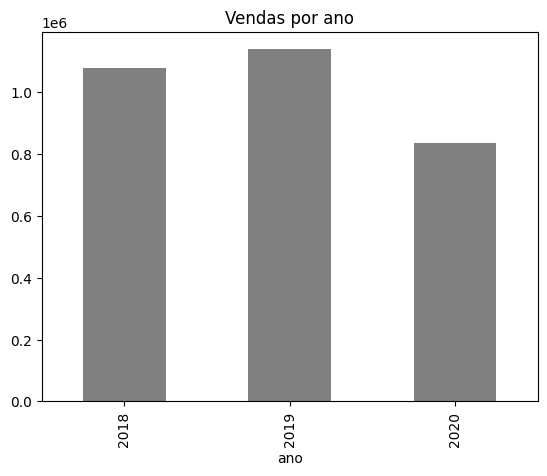

In [53]:
df_ano_total.plot.bar(color='gray')
plt.title('Vendas por ano')

## Vendas por meses

**Ano de 2018**

In [54]:
# Filtrar o dataframe para o ano 2018
df_principal_2018 = df_principal[df_principal['ano'] == 2018]

In [55]:
# Dataframe no ano de 2018
# df_principal_2018

In [56]:
# Adiciona uma nova coluna chamada 'mes' (mês) ao DataFrame df_principal_2018
df_principal_2018.loc[:, 'mes'] = pd.to_datetime(df_principal_2018['Data']).dt.month

<ipython-input-56-19658f786125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_principal_2018.loc[:, 'mes'] = pd.to_datetime(df_principal_2018['Data']).dt.month


In [57]:
# cria um novo DataFrame chamado df_mes_total_2018, ele agrupa o DataFrame df_principal_2018 pela coluna 'mes' (mês).
# Dentro de cada grupo (mês), calcula a soma dos valores na coluna 'Total'
df_mes_total_2018 = df_principal_2018.groupby('mes')['Total'].sum()
df_mes_total_2018

,Total
mes,
1,89571.85
2,58994.03
3,88816.44
4,44441.76
5,94853.38
6,132030.36
7,155270.87
8,107533.93
9,53347.15


Text(0.5, 1.0, 'Vendas por meses em 2018')

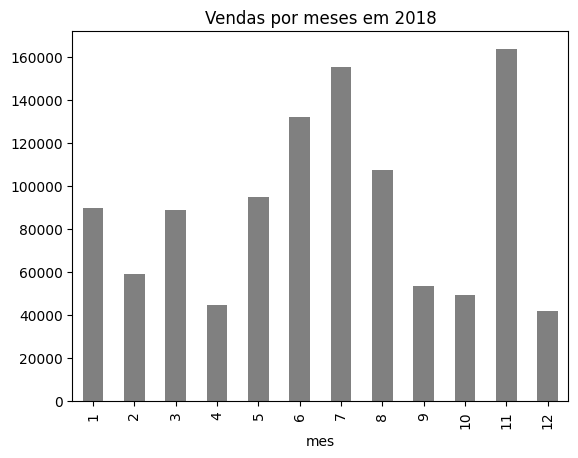

In [58]:
df_mes_total_2018.plot.bar(color='gray')
plt.title('Vendas por meses em 2018')

In [59]:
# plt.figure(figsize=(15,5))
# plt.bar(df_mes_total_2018.index, df_mes_total_2018.values)
# plt.title('Vendas por meses em 2018')

**Ano de 2019**

In [60]:
df_principal_2019 = df_principal[df_principal['ano'] == 2019]
# df_principal_2019

In [61]:
df_principal_2019.loc[:, 'mes'] = pd.to_datetime(df_principal_2019['Data']).dt.month

<ipython-input-61-fecb4ffde4c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_principal_2019.loc[:, 'mes'] = pd.to_datetime(df_principal_2019['Data']).dt.month


In [62]:
df_mes_total_2019 = df_principal_2019.groupby('mes')['Total'].sum()
df_mes_total_2019

,Total
mes,
1,161724.88
2,97886.84
3,85676.18
4,144370.40
5,44817.64
6,51654.73
7,41696.86
8,106413.50
9,76287.66


Text(0.5, 1.0, 'Vendas por meses em 2019')

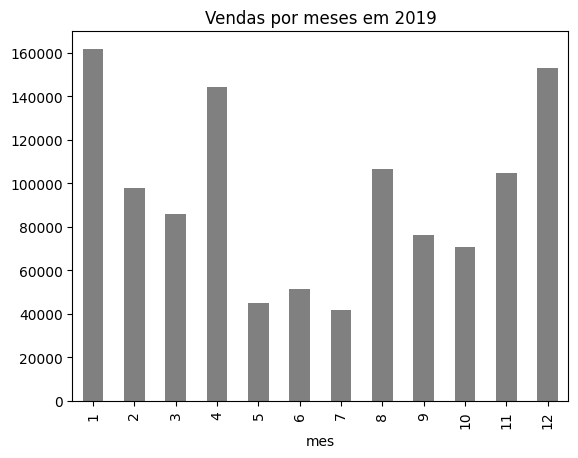

In [63]:
df_mes_total_2019.plot.bar(color='gray')
plt.title('Vendas por meses em 2019')

In [64]:
# plt.figure(figsize=(15,5))
# plt.bar(df_mes_total_2019.index, df_mes_total_2019.values)
# plt.title('Vendas por meses em 2019')

**Ano de 2020**

In [65]:
df_principal_2020 = df_principal[df_principal['ano'] == 2020]
# df_principal_2020

In [66]:
df_principal_2020.loc[:, 'mes'] = pd.to_datetime(df_principal_2020['Data']).dt.month

<ipython-input-66-8563c84ac7ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_principal_2020.loc[:, 'mes'] = pd.to_datetime(df_principal_2020['Data']).dt.month


In [67]:
df_mes_total_2020 = df_principal_2020.groupby('mes')['Total'].sum()
df_mes_total_2020

,Total
mes,
1,99616.30
2,74761.04
3,64670.36
4,59602.42
5,77403.92
6,52298.73
7,16647.70
8,105899.90
9,57257.56


Text(0.5, 1.0, 'Vendas por meses em 2020')

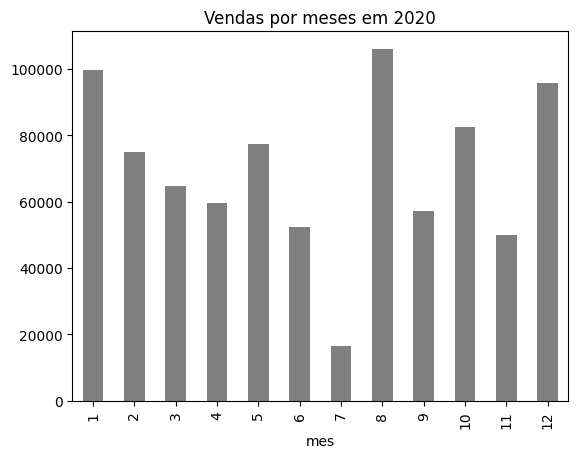

In [68]:
df_mes_total_2020.plot.bar(color='gray')
plt.title('Vendas por meses em 2020')

In [69]:
# plt.figure(figsize=(15,5))
# plt.bar(df_mes_total_2020.index, df_mes_total_2020.values)
# plt.title('Vendas por meses em 2020')

# **Produtos**

In [70]:
df_secundario.head(5)

,VendasID,Quantidade,ValorUnitario,ValorTotal,Desconto,TotalComDesconto,Produto_Produto,Produto_Preco
ProdutoID,,,,,,,,
2,400,2,9201.00,18402.00,6256.6800,12145.3200,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201
2,385,2,9201.00,18402.00,5704.6200,12697.3800,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201
4,395,2,6892.20,13784.40,5100.2280,8684.1720,Bicicleta Trinc Câmbios Shimano Aro 29 Freio A...,7658
4,367,2,6509.30,13018.60,4816.8820,8201.7180,Bicicleta Trinc Câmbios Shimano Aro 29 Freio A...,7658
2,380,2,7038.77,14077.54,4364.0374,9713.5026,Bicicleta Altools Stroll Aro 26 Freio À Disco ...,9201


## Produtos mais vendidos

**Produtos mais vendidos em quantidade**

In [71]:
df_produtos_qt = df_secundario.groupby('Produto_Produto').count().Quantidade.sort_values(ascending=False)
df_produtos_qt

,Quantidade
Produto_Produto,
Camiseta Predactor 3Xu Multiplied,130
Bermuda Predactor 3Xu Pro,122
Luva De Ciclismo - Gometws Sports,115
Capacete Gometws Endorphine 2.0,100
Bicicleta Gometws Endorphine 7.3 - Shimano Alumínio Aro 29 - 24 Marchas,86
Bicicleta Altools Stroll Aro 26 Freio À Disco 21 Marchas,82
Bicicleta Aro 29 Mountain Bike Endorphine 6.3 - 24 Marchas - Shimano - Alumínio,82
Bicicleta Gometws Endorphine 6.1 Shimano Alumínio- Aro 26 - 21 Marchas,75
Bicicleta Gts Advanced 1.0 Aro 29 Freio Disco Câmbio Traseiro Shimano 24 Marchas,75


**Produtos que mais geram receita**

In [72]:
df_produtos_receita = df_secundario.groupby('Produto_Produto').sum().ValorTotal.sort_values(ascending=False)
df_produtos_receita

,ValorTotal
Produto_Produto,
Bicicleta Altools Stroll Aro 26 Freio À Disco 21 Marchas,845121.09
Bicicleta Aro 29 Mountain Bike Endorphine 6.3 - 24 Marchas - Shimano - Alumínio,725846.28
Bicicleta Trinc Câmbios Shimano Aro 29 Freio A Disco 24v,581004.81
Bicicleta Gts Advanced 1.0 Aro 29 Freio Disco Câmbio Traseiro Shimano 24 Marchas,348954.22
Bicicleta Gometws Endorphine 7.3 - Shimano Alumínio Aro 29 - 24 Marchas,270795.80
Bicicleta Gometws Endorphine 6.1 Shimano Alumínio- Aro 26 - 21 Marchas,220118.03
Luva De Ciclismo - Gometws Sports,19375.10
Camiseta Predactor 3Xu Multiplied,16677.86
Capacete Gometws Endorphine 2.0,13654.98


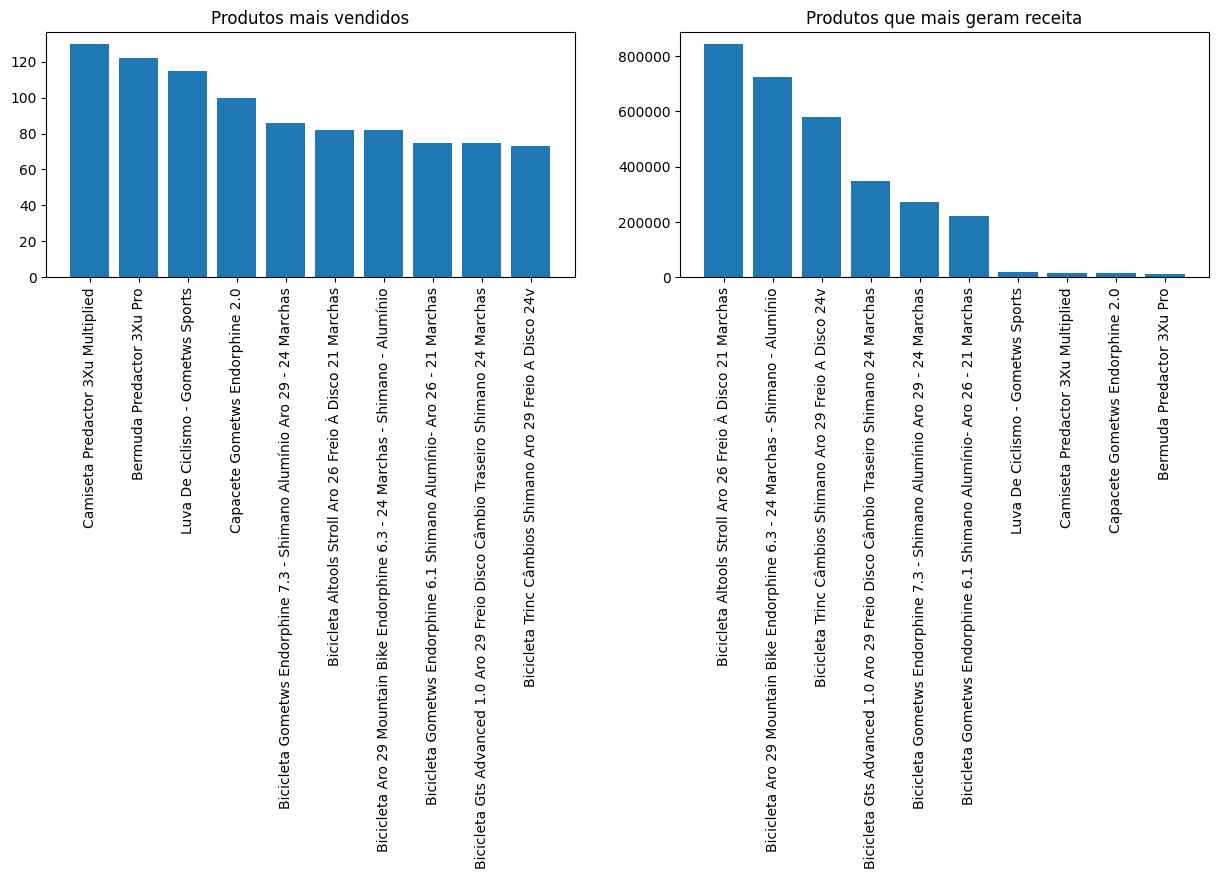

In [73]:
# Comparação
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
df_produtos_qt = df_secundario.groupby('Produto_Produto').count().ValorTotal.sort_values(ascending=False)
plt.bar(df_produtos_qt.index, df_produtos_qt.values)
plt.title('Produtos mais vendidos')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
df_produtos_receita = df_secundario.groupby('Produto_Produto').sum().ValorTotal.sort_values(ascending=False)
plt.bar(df_produtos_receita.index, df_produtos_receita.values)
plt.title('Produtos que mais geram receita')
plt.xticks(rotation=90)

plt.show()

## Total de descontos por produto

In [74]:
df_desconto = df_secundario.groupby('Produto_Produto').sum().TotalComDesconto.sort_values(ascending=False)
df_desconto

,TotalComDesconto
Produto_Produto,
Bicicleta Altools Stroll Aro 26 Freio À Disco 21 Marchas,743757.0707
Bicicleta Aro 29 Mountain Bike Endorphine 6.3 - 24 Marchas - Shimano - Alumínio,654113.0366
Bicicleta Trinc Câmbios Shimano Aro 29 Freio A Disco 24v,508822.8751
Bicicleta Gts Advanced 1.0 Aro 29 Freio Disco Câmbio Traseiro Shimano 24 Marchas,305539.1609
Bicicleta Gometws Endorphine 7.3 - Shimano Alumínio Aro 29 - 24 Marchas,240709.7341
Bicicleta Gometws Endorphine 6.1 Shimano Alumínio- Aro 26 - 21 Marchas,196402.9641
Luva De Ciclismo - Gometws Sports,17393.9498
Camiseta Predactor 3Xu Multiplied,14920.4654
Capacete Gometws Endorphine 2.0,11971.0607


# **Análise de Clientes**

## Clientes que mais fazem compras

In [75]:
df_compras = df_principal.groupby('cliente_Cliente').count().Total.sort_values(ascending=False)
df_compras

,Total
cliente_Cliente,
Antão Corte-Real,83
Brígida Gusmão,37
Cidália Miera,36
Hermígio Villaverde,13
Gertrudes Hidalgo,12
...,...
Feliciano Franca,1
Filipa Mattozo,1
Flamínia Miera,1


## Clientes que mais gastam

In [76]:
df_gastos = df_principal.groupby('cliente_Cliente')['Total'].sum().sort_values(ascending=False)
df_gastos

,Total
cliente_Cliente,
Antão Corte-Real,640268.07
Brígida Gusmão,366502.71
Cidália Miera,271000.02
Gertrudes Hidalgo,96443.30
Ilduara Chávez,80674.51
...,...
Alarico Quinterno,155.00
Ifigénia Pires,143.82
Herculano Viveiros,115.00


## Estados que mais geram receita

In [77]:
df_principal

,VendedorID,ClienteID,Data,Total,cliente_Cliente,cliente_Estado,cliente_Genero,cliente_Status,Nome_Vendedor,ano
VendasID,,,,,,,,,,
1,1,91,2019-01-01,8053.60,Cosme Zambujal,BA,M,Silver,Armando Lago,2019
2,6,185,2020-01-01,150.40,Gertrudes Hidalgo,PA,F,Silver,Iberê Lacerda,2020
3,7,31,2020-01-02,6087.00,Antão Corte-Real,ES,M,Silver,Jéssica Castelão,2020
4,5,31,2019-01-02,13828.60,Antão Corte-Real,ES,M,Silver,Hélio Liberato,2019
5,5,31,2018-01-03,26096.66,Antão Corte-Real,ES,M,Silver,Hélio Liberato,2018
...,...,...,...,...,...,...,...,...,...,...
396,5,103,2018-12-23,10415.38,David Brás,RJ,M,Silver,Hélio Liberato,2018
397,5,58,2019-12-23,16995.20,Brígida Gusmão,DF,F,Silver,Hélio Liberato,2019
398,1,58,2019-12-24,5183.30,Brígida Gusmão,DF,F,Silver,Armando Lago,2019


In [78]:
df_receita_estado = df_principal.groupby('cliente_Estado')['Total'].sum().sort_values(ascending=False)
df_receita_estado

,Total
cliente_Estado,
ES,657143.04
DF,382560.76
SE,357603.80
PI,182652.03
MA,164817.99
BA,141552.55
MG,120794.92
PA,120344.29
SC,112184.92


Text(0.5, 1.0, 'Estados que mais geram receita')

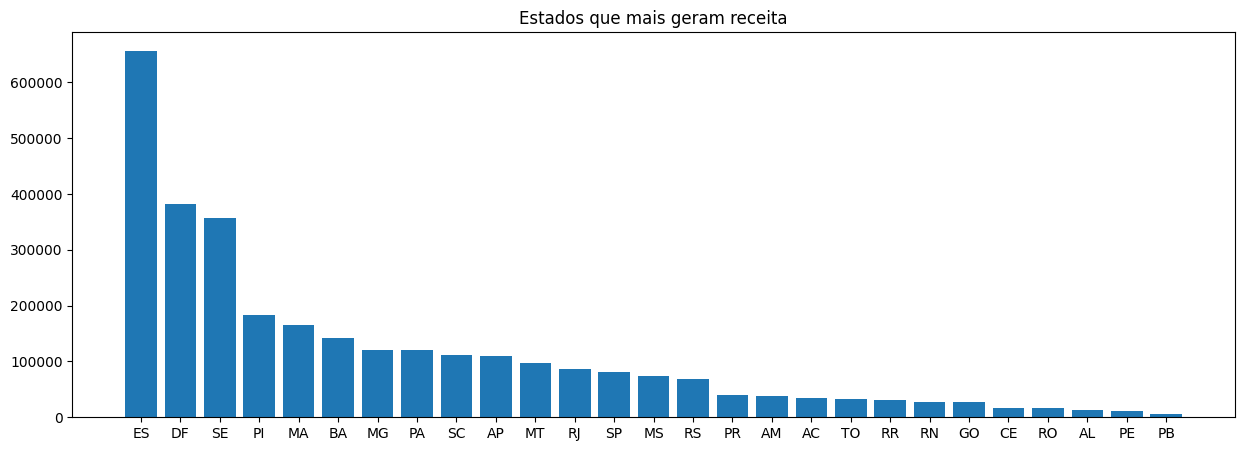

In [79]:
plt.figure(figsize=(15,5))
plt.bar(df_receita_estado.index, df_receita_estado.values)
plt.title('Estados que mais geram receita')

# **Análise de Vendedores**

**Vendedores que mais vendem**

In [80]:
df_vendedores = df_principal.groupby('Nome_Vendedor')['Total'].sum().sort_values(ascending=False)
df_vendedores

,Total
Nome_Vendedor,
Hélio Liberato,692889.87
Jéssica Castelão,435126.82
Tobias Furtado,369886.31
Capitolino Bahía,294785.10
Simão Rivero,275123.61
Daniel Pirajá,263446.80
Godo Capiperibe,250918.16
Iberê Lacerda,187916.75
Armando Lago,166851.81


**Vendedores que menos vendem**

In [81]:
df_vendedores.sort_values(ascending=True)

,Total
Nome_Vendedor,
Napoleão Méndez,117217.50
Armando Lago,166851.81
Iberê Lacerda,187916.75
Godo Capiperibe,250918.16
Daniel Pirajá,263446.80
Simão Rivero,275123.61
Capitolino Bahía,294785.10
Tobias Furtado,369886.31
Jéssica Castelão,435126.82
